## Analyze A/B Test Results

- Student: Daniel Guarino
- Pyhthon libraries: Pandas, Numpy, Matplotlib, Seaborn and Statsmodels


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
# Return number of unique elements in the object.
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

These columns have two possible values:
- group: control / treatment (string)
- landing_page: old_page / new_page (string)
- converted: 0 or 1 (int)

d. The proportion of users converted.

In [5]:
converted_users = df['converted'].sum()
converted_users

35237

In [6]:
sample_size = df.shape[0]
sample_size

294478

In [7]:
proportions_users_converted = converted_users / sample_size
proportions_users_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
dont_match = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
dont_match

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No missing values at all!

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Create a new dataset that meets cleans this dataset.  Store your new dataframe in **df2**.

In [10]:
# find  which are the indexes (and visualize some of them) for group = treatment different than new_page
index_list = list(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)
index_list[0:5]

[22, 240, 308, 327, 357]

In [11]:
# drop these rows
df2 = df
df2.drop(index = index_list, inplace = True)

In [12]:
# Check if we have been successfully in dropping the rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
# Double Check if all of the undesired rows were removed - this should return 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


repeated user_id: 773192

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop(index = 1899, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [19]:
# Check if we have succesfully dropped the duplicated user_id
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
converted = df2[df2['converted'] == 1]['converted'].count()
converted

34753

In [21]:
new_size = df2.shape[0]
new_size

290584

In [22]:
probability_converting = converted / new_size
probability_converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [24]:
control_group = df2[df2['group'] == 'control']['group'].count()
control_group

145274

In [25]:
control_converted = df2[(df2['group'] == 'control') & df['converted'] == 1]['converted'].count()
control_converted

17489

In [26]:
probability_converted_given_control = control_converted / control_group
probability_converted_given_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [27]:
treatment_group = df2[df2['group'] == 'treatment']['group'].count()
treatment_group

145310

In [28]:
treatment_converted = df2[(df2['group'] == 'treatment') & df['converted'] == 1]['converted'].count()
treatment_converted

17264

In [29]:
probability_converted_given_treatment = treatment_converted / treatment_group
probability_converted_given_treatment

0.11880806551510564

In [30]:
assert df2[df2['group'] == 'treatment']['group'].count() + control_group == df2.shape[0]

d. What is the probability that an individual received the new page?

In [31]:
new_size

290584

In [32]:
new_page = df2[df2['landing_page'] == 'new_page']['landing_page'].count()
new_page

145310

In [33]:
probability_new_page = new_page / new_size
probability_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [34]:
obs_diff = probability_converted_given_treatment - probability_converted_given_control
obs_diff

-0.0015782389853555567

So far by the observed evidence we know the probability of a convertion is larger for the control group than the treatment group, but we haven't made any test so far to conclude if this is only by chance. We still need to bootstrap to create a distribution sample and calculate de p-value to achieve a conclusion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} \leq 0$$


$$H_1: P_{new} - P_{old} > 0$$


**$          P_{new}$ and $P_{old}$ are the proportion of clicks for the new and old page, respectivley.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [35]:
p_new = probability_converting
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [36]:
p_old = probability_converting
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [37]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [38]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [39]:
treatment = df2[(df2['group'] == 'treatment') & (df2['landing_page'] == 'new_page')]['converted']
new_page_converted = np.random.choice(treatment, n_new, p_new)

In [40]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
control = df2[(df2['group'] == 'control') & (df2['landing_page'] == 'old_page')]['converted']
old_page_converted = np.random.choice(control, n_old, p_old)

In [42]:
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [43]:
new_page_converted.mean() - old_page_converted.mean()

-9.017722392506977e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [44]:
p_diffs = []
for bootstrap in range(10000):
    new_page_converted = np.random.choice(treatment, n_new, p_new)
    old_page_converted = np.random.choice(control, n_old, p_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

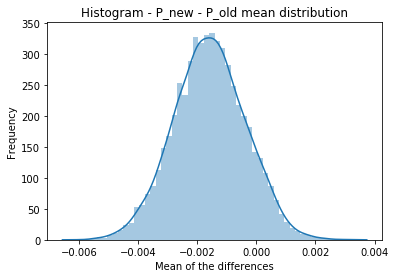

In [45]:
# sampling distribution
p_diffs = np.array(p_diffs)

sns.distplot(p_diffs)
plt.title('Histogram - P_new - P_old mean distribution')
plt.xlabel('Mean of the differences')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
# compute de p value
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [47]:
# we calculated this in the part I
obs_diff = probability_converted_given_treatment - probability_converted_given_control
obs_diff

-0.0015782389853555567

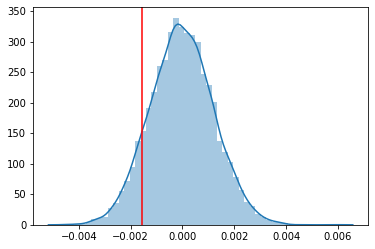

In [48]:
# null distributiion
sns.distplot(null_vals)
plt.axvline(x = obs_diff, color = 'red')
plt.title('')
plt.xlabel('')
plt.ylabel('');

In [49]:
p_value = (null_vals > obs_diff).mean()
p_value

0.897

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Conclusion:**

The called p-value is the probability of observing the proportion of clicks in the old page.

In this case we have found a 90.10% p-value

Choosing a  value of $\alpha = 5 \% $ as threshold value, it's possible to conclude that our P-value > $\alpha $

So, we can say we failed to reject $ H_0 $

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [50]:
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2[(df['group'] == 'control') & df['converted'] == 1]['converted'].count()
convert_new = df2[(df['group'] == 'treatment') & df['converted'] == 1]['converted'].count()
n_old = df2.query('group == "control"').shape[0] 
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [51]:
stat, pval = proportions_ztest(np.array([convert_old,convert_new]),np.array([n_old,n_new]), alternative = 'larger')
print('Z-test: ', stat)
print('p-value: ',pval)

Z-test:  1.3109241984234394
p-value:  0.09494168724097551


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Using the built-in library we have found a p-value of 9.50% which is quite different to the value found above from the sampling distributuion (90.10%). So we can conclude the sampling distributions findinds agree with built-in findings, since they are larger than the 5% threshold value. We fail to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression, since we want to predict a number between 0 and 1 (the proportion of conversions in two different web pages layout).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
# Creating the 'intercept' columns
df2['intercept'] = 1

In [53]:
def abpage(df2):
    if df2['group'] == 'control':
        return 0
    elif df2['group'] == 'treatment':
        return 1

In [54]:
# Creating the column ab_page
df2['ab_page'] = df2.apply(lambda df2: abpage(df2), axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [55]:
import statsmodels.api as sm

In [56]:
log_reg = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        12:26:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In this case the p-value computed on Python is a two tailed test like this:

$$H_0: P_{new} - P_{old} = 0$$


$$H_1: P_{new} - P_{old} \neq 0$$

The null hypothesis is asking if we have a correlation between the conversions and the new page. The alternative (the one we're trying to prove) is if there's a corretion between them.

From the logistic regression model we obtained a p-value = 19% (a different value than we found in the one-tailed test we did above). As the p-value found is larger than 5% we fail to reject the null hypothesis, **the new_page is not correlated to conversions.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding more variables to the model help us to discover if these new variables contribute in predicting if the new web page is gonna have more convertions than the old one (based on past calculations). The disadvantages is that we can have a relation among these new variables, which add some redundancy and also return a wrong model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [58]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [59]:
df_country['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [60]:
df2.set_index('user_id', inplace = True)
df_country.set_index('user_id', inplace = True)

In [61]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [62]:
df_country.head()

,country
user_id,
834778,UK
928468,US
822059,UK
711597,UK
710616,UK


In [63]:
df2 = df2.join(df_country)

In [64]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [65]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
# creating addiconal columns
df2['UK_ab_page'] = df2['UK'] * df2['ab_page']
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['CA_ab_page'] = df2['CA'] * df2['ab_page']
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [67]:
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'US_ab_page', 'CA_ab_page', 'UK_ab_page']])
results = log_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2019   Pseudo R-squ.:               3.351e-05
Time:                        12:26:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
US_ab_page    -0.0183      0.013     -1.449      0.147      -0.043       0.006
CA_ab_page    -0.0827      0.038     -2.176      0.030      -0.157      -0.008
UK_ab_page     0.0074      0.018      0.410      0.682      -0.028       0.043
==============================================================================
"""

From the logistic regression obtained p-values for the interaction coefficients we can conclude Canada have a p-value = 3% (< 5% our threshold value), so we can observe a correlation between conversions and this country. UK and US have both their p-values larger than 5% (14,7% and 68.2% respectively), so they don't have significant effects on conversion (no correlation).

### Final conclusions

From the first and second part of this project we can conclude there's no signficant change in conversions in the new page comparing to the old one. In the third part we could observe a significant change in conversions in favor to new web page for Canada customers.